### `Why Are These Insights Valuable`
These insights have many uses, including

    Debugging
    Informing feature engineering
    Directing future data collection
    Informing human decision-making
    Building Trust

###  Permutation Importance - WHAT FEATURES OUR MODEL THINKS IS IMPORTANT

    permutation importance is:

    Fast to calculate
    Widely used and understood
    Consistent with properties we would want a feature importance measure to have

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match']=="Yes")
features = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
model = RandomForestClassifier(max_depth=2, n_estimators=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.56      0.75      0.64        12
        True       0.81      0.65      0.72        20

   micro avg       0.69      0.69      0.69        32
   macro avg       0.69      0.70      0.68        32
weighted avg       0.72      0.69      0.69        32

[[ 9  3]
 [ 7 13]]
0.6875


In [19]:
!pip install eli5

  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\2b\67\89\414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate


In [22]:
import eli5
from eli5.sklearn import PermutationImportance

In [23]:
perm = PermutationImportance(model,random_state=1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names=X.columns.tolist())

Weight,Feature
0.1437 ± 0.1159,Goal Scored
0.0437 ± 0.0306,Blocked
0.0187 ± 0.0637,Off-Target
0.0063 ± 0.0468,Corners
0.0063 ± 0.0468,Free Kicks
0 ± 0.0000,Red
0 ± 0.0000,Yellow & Red
0.0000 ± 0.0559,On-Target
0 ± 0.0000,Goals in PSO
-0.0063 ± 0.0468,Attempts


### Partial Plots - How does each feature affect our predictions?

    This is useful to answer questions like:

    Controlling for all other house features, what impact do longitude and latitude have on home prices? To restate this, how would similarly sized houses be priced in different areas?

    Are predicted health differences between two groups due to differences in their diets, or due to some other factor?

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match']=="Yes")
features = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=5,random_state=0)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100)

              precision    recall  f1-score   support

       False       0.56      0.60      0.58        15
        True       0.62      0.59      0.61        17

   micro avg       0.59      0.59      0.59        32
   macro avg       0.59      0.59      0.59        32
weighted avg       0.60      0.59      0.59        32

[[ 9  6]
 [ 7 10]]
59.375


In [7]:
# from sklearn import tree
# import graphviz

# tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=features)
# graphviz.Source(tree_graph)

In [8]:
!pip install pdpbox

  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\7d\08\51\63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [9]:
import matplotlib.pyplot as plt
from pdpbox import pdp, info_plots, get_dataset

In [15]:
features

['Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Goals in PSO']

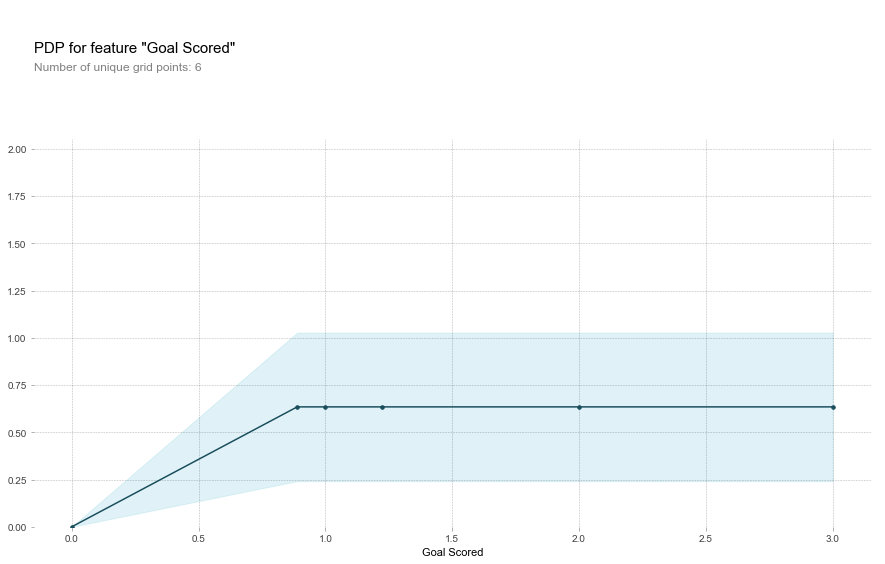

In [10]:
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=X_test, model_features=features,feature='Goal Scored')
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

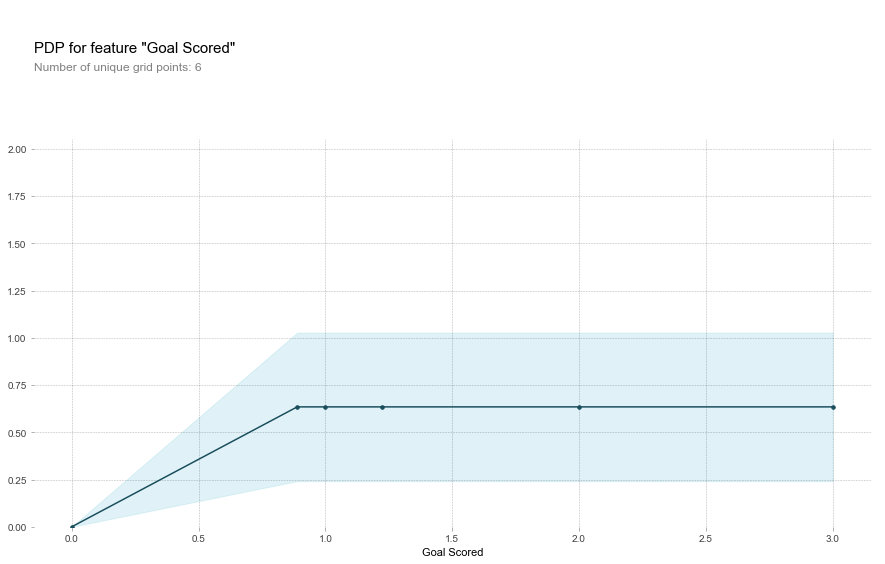

In [19]:
feature_to_plot = 'Goal Scored'
blk = pdp.pdp_isolate(model=tree_model,model_features=features,feature=feature_to_plot,dataset=X_test)
pdp.pdp_plot(blk, feature_to_plot)
plt.show()

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0xa35b1894a8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0xa35c395550>})

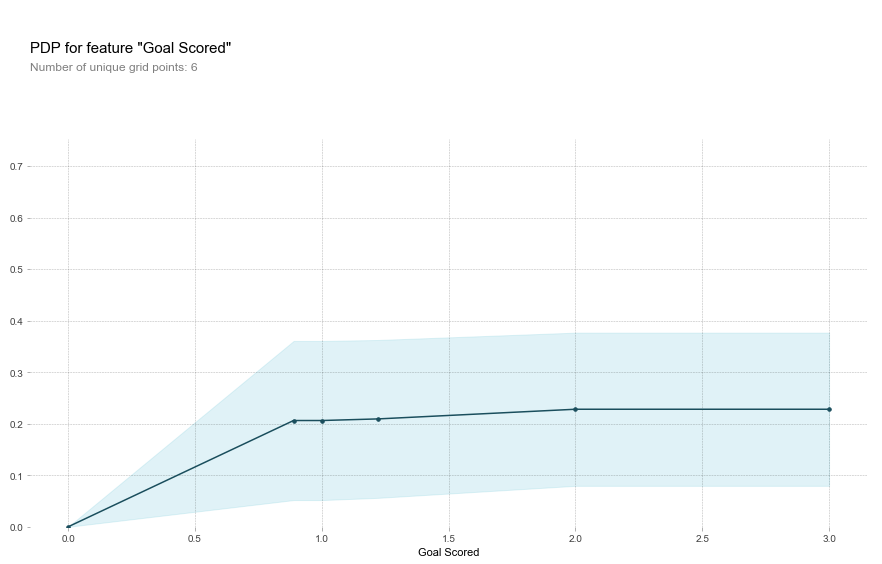

In [20]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)

dist = pdp.pdp_isolate(model=rf_model,dataset=X_test,model_features=features,feature=feature_to_plot)
pdp.pdp_plot(dist,feature_to_plot)

#### 2D Partial Dependence Plots

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

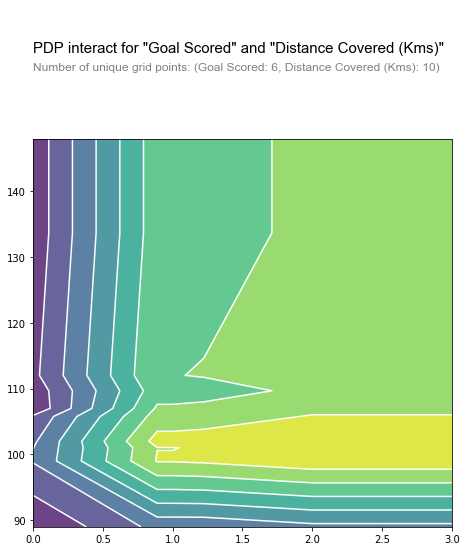

In [23]:
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1 = pdp.pdp_interact(model=rf_model,dataset=X_test,model_features=features,features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1,feature_names=features_to_plot)
plt.show()

### Shap Values - UNDERSTANDING INDIVIDUAL PREDICTIONS 

In [24]:
!pip install shap